# Project - Telecom Churning Customer Prediction

# Content
### Each row represents a customer, each column contains customer’s attributes described on the column Metadata.

The data set includes information about:

Customers who left within the last month – the column is called Churn
Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
Demographic info about customers – gender, age range, and if they have partners and dependents

## Data Information
customerID Customer ID

gender: Customer gender (female, male)

SeniorCitizen: Whether the customer is a senior citizen or not (1, 0)

Partner: Whether the customer has a partner or not (Yes, No)
    
Dependents: Whether the customer has dependents or not (Yes, No)
    
tenure: Number of months the customer has stayed with the company
    
PhoneService: Whether the customer has a phone service or not (Yes, No)
    
MultipleLines: Whether the customer has multiple lines or not (Yes, No, No phone service)
    
InternetService: Customer’s internet service provider (DSL, Fiber optic, No)
    
OnlineSecurity: Whether the customer has online security or not (Yes, No, No internet service)
    
OnlineBackup: Whether the customer has online backup or not (Yes, No, No internet service)
    
DeviceProtection: Whether the customer has device protection or not (Yes, No, No internet service)
    
TechSupport: Whether the customer has tech support or not (Yes, No, No internet service)
    
StreamingTV: Whether the customer has streaming TV or not (Yes, No, No internet service)
    
StreamingMovies: Whether the customer has streaming movies or not (Yes, No, No internet service)
    
Contract: The contract term of the customer (Month-to-month, One year, Two year)
    
PaperlessBilling: Whether the customer has paperless billing or not (Yes, No)
    
PaymentMethod: The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
    
MonthlyCharges: The amount charged to the customer monthly
    
TotalCharges: The total amount charged to the customer
    
Churn: Whether the customer churned or not (Yes or No)
    

In [144]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.metrics import roc_auc_score,roc_curve,scorer
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
%matplotlib inline

In [145]:
dataset = pd.read_csv("data\WA_Fn-UseC_-Telco-Customer-Churn.csv") # Import Data

In [57]:
dataset.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [58]:
dataset.describe() #Looking at below Total Charges does not have all data numeric

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [59]:
dataset = dataset[dataset['TotalCharges']!= " "] # Remove all records where Total Charges are blank

In [60]:
dataset.shape # After removing the data the shape is below

(7032, 21)

In [61]:
dataset['TotalCharges'] = dataset["TotalCharges"].astype(float) # Convert column to to float type
dataset.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [62]:
#Check Unique records of the categorical column
for i in dataset.select_dtypes(include=['object']).columns:
    if i != "customerID":
        print("Unique Values of column: " + i)
        print(dataset[i].unique())

Unique Values of column: gender
['Female' 'Male']
Unique Values of column: Partner
['Yes' 'No']
Unique Values of column: Dependents
['No' 'Yes']
Unique Values of column: PhoneService
['No' 'Yes']
Unique Values of column: MultipleLines
['No phone service' 'No' 'Yes']
Unique Values of column: InternetService
['DSL' 'Fiber optic' 'No']
Unique Values of column: OnlineSecurity
['No' 'Yes' 'No internet service']
Unique Values of column: OnlineBackup
['Yes' 'No' 'No internet service']
Unique Values of column: DeviceProtection
['No' 'Yes' 'No internet service']
Unique Values of column: TechSupport
['No' 'Yes' 'No internet service']
Unique Values of column: StreamingTV
['No' 'Yes' 'No internet service']
Unique Values of column: StreamingMovies
['No' 'Yes' 'No internet service']
Unique Values of column: Contract
['Month-to-month' 'One year' 'Two year']
Unique Values of column: PaperlessBilling
['Yes' 'No']
Unique Values of column: PaymentMethod
['Electronic check' 'Mailed check' 'Bank transfer (

In [63]:
#From the above result we can change 'No internet service' to No for the following columns
cols = [ 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection','TechSupport','StreamingTV', 'StreamingMovies']
for i in cols:
    dataset[i] = dataset[i].replace({'No internet service' : 'No'})

In [65]:
#Check Unique records of the categorical column
for i in dataset.select_dtypes(include=['object']).columns:
    if i != "customerID":
        print("Unique Values of column: " + i)
        print(dataset[i].unique())

Unique Values of column: gender
['Female' 'Male']
Unique Values of column: Partner
['Yes' 'No']
Unique Values of column: Dependents
['No' 'Yes']
Unique Values of column: PhoneService
['No' 'Yes']
Unique Values of column: MultipleLines
['No phone service' 'No' 'Yes']
Unique Values of column: InternetService
['DSL' 'Fiber optic' 'No']
Unique Values of column: OnlineSecurity
['No' 'Yes']
Unique Values of column: OnlineBackup
['Yes' 'No']
Unique Values of column: DeviceProtection
['No' 'Yes']
Unique Values of column: TechSupport
['No' 'Yes']
Unique Values of column: StreamingTV
['No' 'Yes']
Unique Values of column: StreamingMovies
['No' 'Yes']
Unique Values of column: Contract
['Month-to-month' 'One year' 'Two year']
Unique Values of column: PaperlessBilling
['Yes' 'No']
Unique Values of column: PaymentMethod
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Unique Values of column: Churn
['No' 'Yes']


In [66]:
#Separating catagorical and numerical columns
Id_col     = ['customerID']
target_col = ["Churn"]
cat_cols   = dataset.nunique()[dataset.nunique() < 6].keys().tolist()
cat_cols   = [x for x in cat_cols if x not in target_col]
num_cols   = [x for x in dataset.columns if x not in cat_cols + target_col + Id_col]

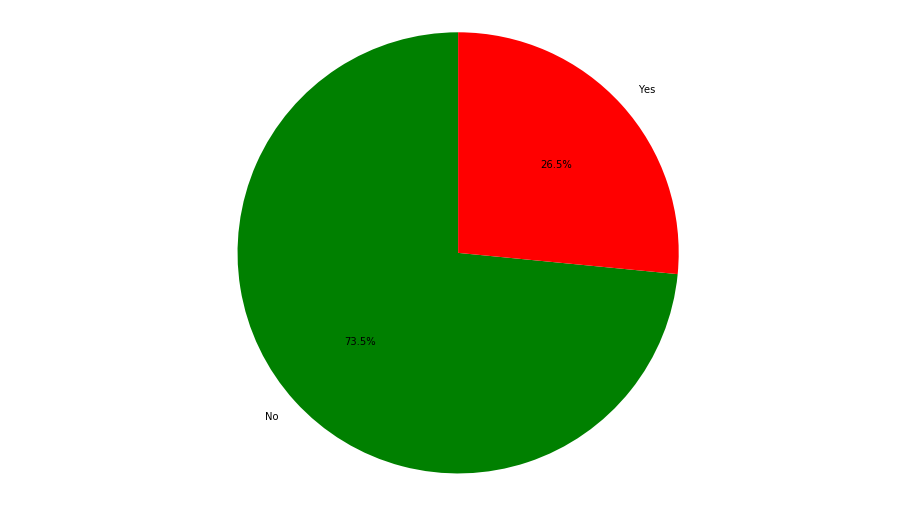

In [146]:
#Plot to check the percentage of Churning  
fig = plt.figure(figsize=(16,9))

plt.pie(dataset['Churn'].value_counts().values.tolist(), labels=dataset['Churn'].value_counts().keys().tolist(), autopct='%1.1f%%',
        shadow=False, startangle=90, colors=('green','red'))
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [68]:

def StackedBarChart(Indexcol, DataCol):
    # Use of Pivot function with aggregate function length to get the grouped data with field 'sex' againts for each label
    pivot_data = dataset.pivot_table(index=Indexcol,columns=DataCol,values='customerID',aggfunc=len,fill_value=0,margins=True)
    pivot_data_percent = pivot_data.div( pivot_data.iloc[:,-1], axis=0 )
    pivot_data_percent.iloc[:-1,:-1]
    #Plot the Data
    plot= pivot_data_percent.iloc[:-1,:-1].plot.bar(stacked=True, figsize=(10,7), 
                                                title = Indexcol + " vs Churn", color=('green','red'))
    plot.set(xlabel=Indexcol, ylabel="Percentage%")
    

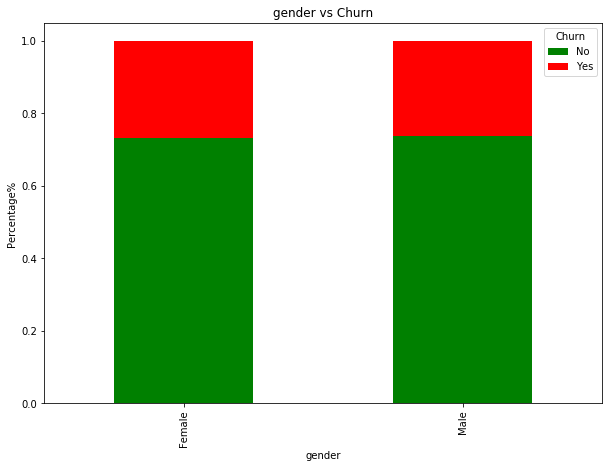

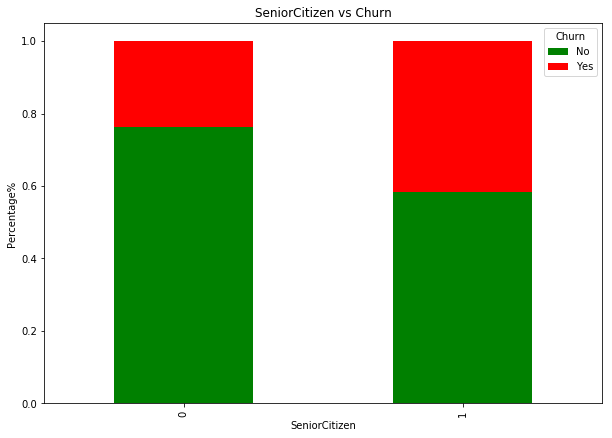

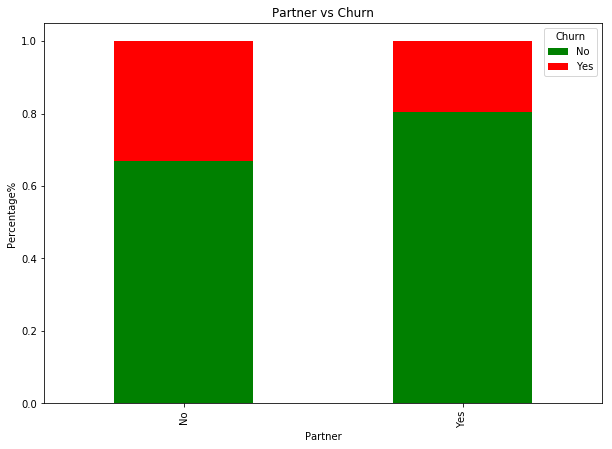

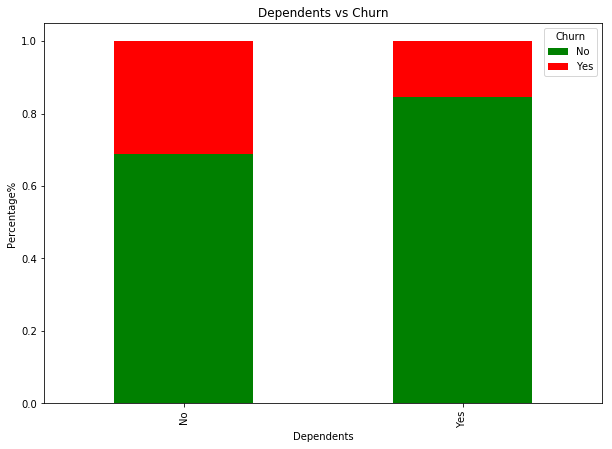

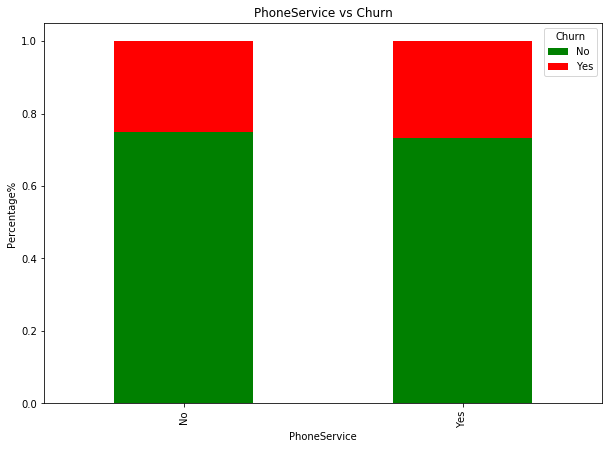

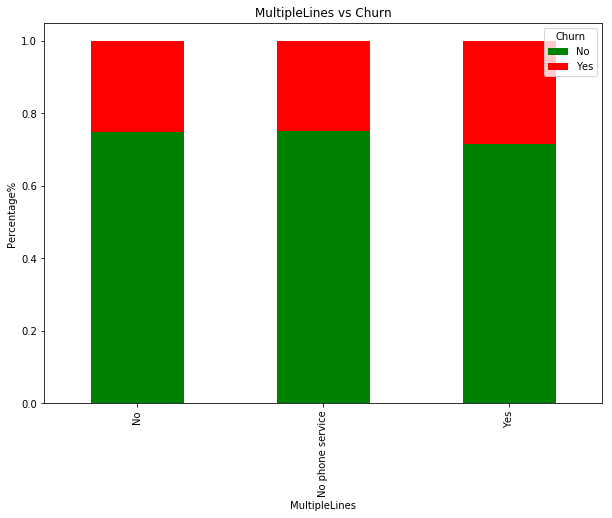

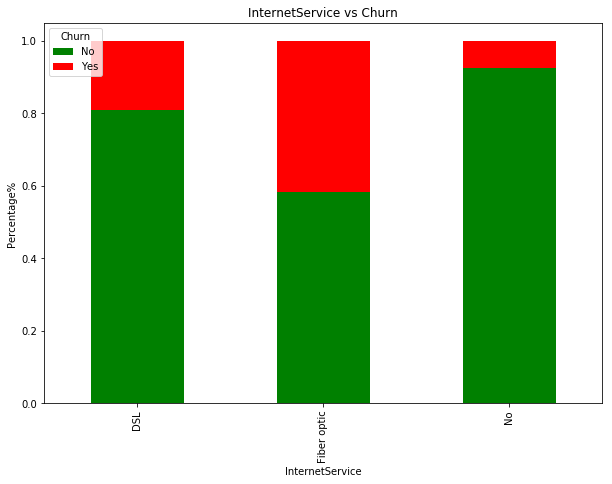

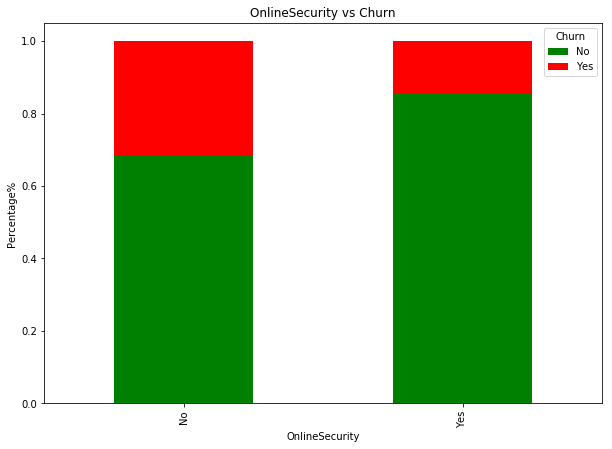

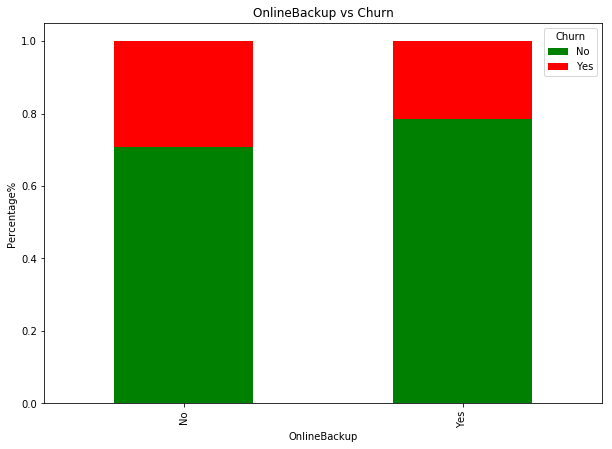

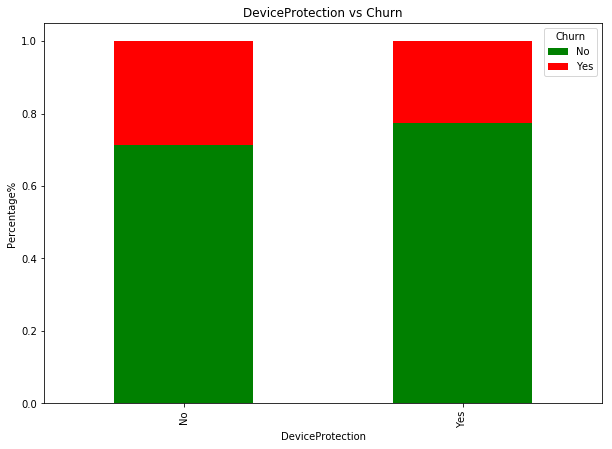

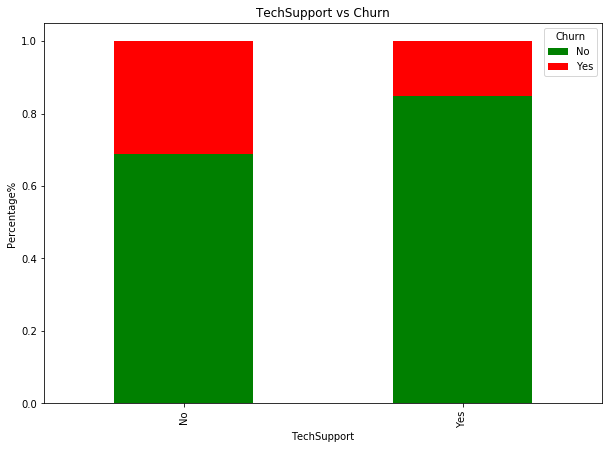

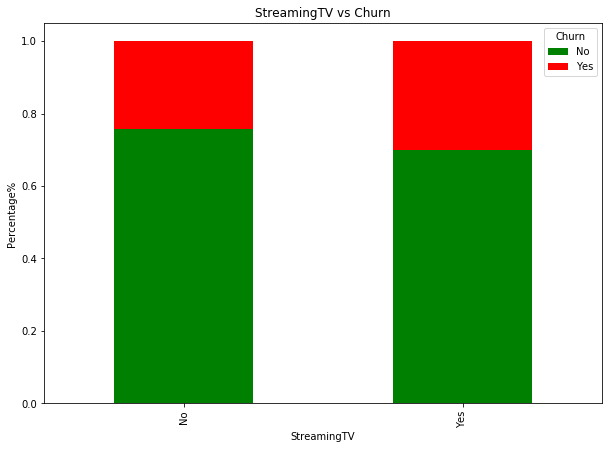

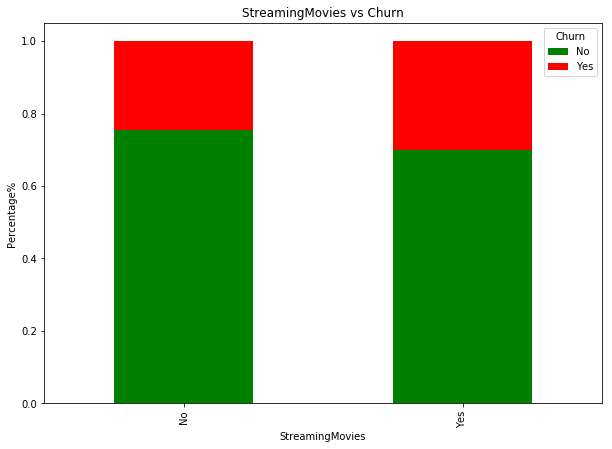

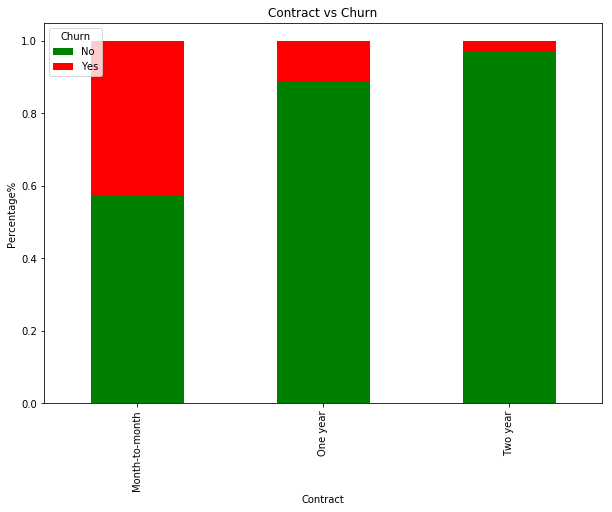

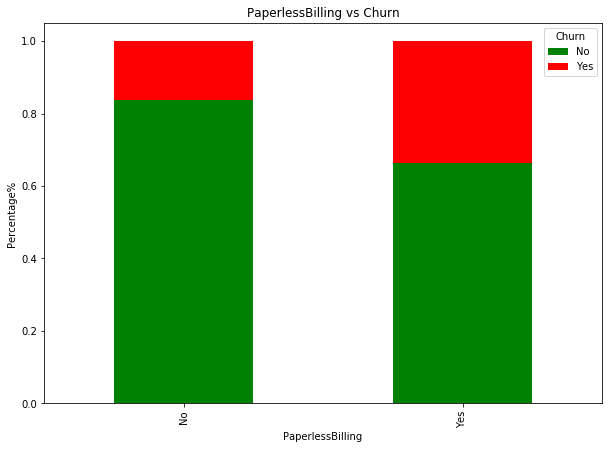

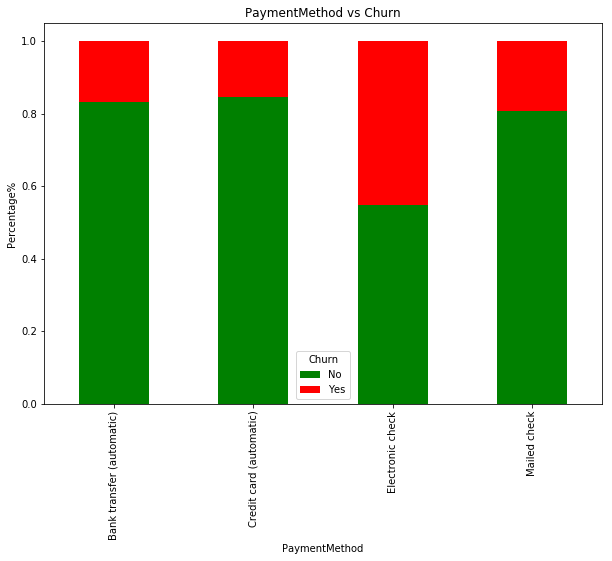

In [69]:
#Stacked Bar charts againts all categorical columns to see % of Churning
for col in cat_cols:
    StackedBarChart(col, "Churn")

In [70]:
#Binary columns with 2 values
bin_cols   = dataset.nunique()[dataset.nunique() == 2].keys().tolist()
#Columns more than 2 values
multi_cols = [i for i in cat_cols if i not in bin_cols]

In [71]:
dataset1 = dataset.copy(deep=True) # Back up copy

In [96]:
dataset = dataset1.copy(deep=True)

In [98]:
#Label encoding Binary columns
le = LabelEncoder()
for i in bin_cols :
    dataset[i] = le.fit_transform(dataset[i])
    
#One Hot encoding columns for multi value columns
dataset = pd.get_dummies(data = dataset,columns = multi_cols)


In [103]:
dataset.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,0,0,1,0,1,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,5575-GNVDE,1,0,0,0,34,1,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,3668-QPYBK,1,0,0,0,2,1,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,7795-CFOCW,1,0,0,0,45,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
4,9237-HQITU,0,0,0,0,2,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0


In [104]:
# Columns to be considered as Features, this excludes the target column and the Customer ID columsn
# 
cols = [i for i in dataset.columns if i not in Id_col + target_col] 


In [105]:
X = dataset[cols]
Y = dataset[target_col]

In [106]:
#Split train and test data
train_X,test_X,train_Y,test_Y = train_test_split(X,Y,test_size = .25 ,random_state = 101)


## Logistic Regression

In [115]:
logit  = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                            intercept_scaling=1, max_iter=100, multi_class='ovr',
                            n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
                            tol=0.0001, verbose=0, warm_start=False)

In [116]:
logit.fit(train_X,train_Y)

C:\Users\Abilash\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Abilash\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = None.
  " = {}.".format(self.n_jobs))


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [118]:
logit.score(train_X, train_Y) # Training Accuracy

0.80242700037921877

In [119]:
logit.score(test_X, test_Y) # Testing Accuracy

0.81797497155858934

In [120]:
y_pred = logit.predict(test_X)

In [122]:
accuracy_score(test_Y,y_pred)*100 

81.797497155858935

In [147]:
# Important Features from logistic regression
coefficients  = pd.DataFrame(logit.coef_.ravel(), index = train_X.columns)
coefficients.sort_values

<bound method DataFrame.sort_values of                                                 0
gender                                   0.018000
SeniorCitizen                            0.240691
Partner                                  0.000197
Dependents                              -0.158105
tenure                                  -0.066788
PhoneService                            -0.393566
OnlineSecurity                          -0.431629
OnlineBackup                            -0.122917
DeviceProtection                        -0.135821
TechSupport                             -0.421137
StreamingTV                              0.109963
StreamingMovies                          0.042062
PaperlessBilling                         0.287332
MonthlyCharges                           0.008607
TotalCharges                             0.000372
MultipleLines_No                        -0.249509
MultipleLines_No phone service           0.124119
MultipleLines_Yes                       -0.144057
InternetSer

In [128]:
# Decision tree with gini
clf_gini = DecisionTreeClassifier(criterion = "gini",
            random_state = 100,max_depth=3, min_samples_leaf=5)

In [129]:
clf_gini.fit(train_X, train_Y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

In [130]:
clf_gini.score(train_X, train_Y) #Training Accuracy

0.78517254455821006

In [131]:
clf_gini.score(test_X, test_Y) #Training Accuracy

0.80147895335608643

In [159]:
featureImportant = pd.DataFrame(clf_gini.feature_importances_, index = train_X.columns, columns=['Importance'])
featureImportant.sort_values('Importance',ascending=False)

,Importance
Contract_Month-to-month,0.614262
InternetService_Fiber optic,0.200764
tenure,0.171963
Contract_One year,0.013011
gender,0.000000
MultipleLines_No,0.000000
PaymentMethod_Electronic check,0.000000
PaymentMethod_Credit card (automatic),0.000000
PaymentMethod_Bank transfer (automatic),0.000000
Contract_Two year,0.000000


In [135]:
rndTree = RandomForestClassifier(n_estimators=10, max_depth = 5)
rndTree.fit(train_X,train_Y)

C:\Users\Abilash\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [136]:
rndTree.score(train_X, train_Y) # Training Accuracy

0.79692832764505117

In [137]:
rndTree.score(test_X, test_Y) # Test Accuracy

0.80887372013651881

In [158]:
# Important Features
featureimportantRand = pd.DataFrame(rndTree.feature_importances_, index = train_X.columns, columns=['Importance'])
featureimportantRand.sort_values('Importance',ascending=False)
#featureimportantRand

,Importance
PaymentMethod_Electronic check,0.161274
tenure,0.153375
InternetService_Fiber optic,0.152211
Contract_Month-to-month,0.129628
TotalCharges,0.114388
Contract_Two year,0.081084
MonthlyCharges,0.042557
PaperlessBilling,0.029069
Contract_One year,0.026909
SeniorCitizen,0.016293
